In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('DATASET/Churn_Modelling.csv', index_col='RowNumber')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [6]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import resample

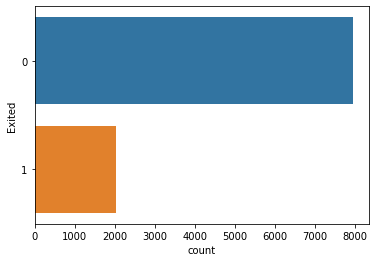

In [8]:

sns.countplot(y='Exited',data=df)
plt.show()

In [9]:
geoEnc = OneHotEncoder(drop='first')
gdummies = geoEnc.fit_transform(df[['Geography']]).toarray()

genderEnc = LabelEncoder()
df.Gender =  genderEnc.fit_transform(df.Gender)

gdummies

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [10]:
df.drop(['Geography','Surname','CustomerId'],axis=1, inplace=True)

In [11]:
import pickle
with open('encoder.pk','wb') as file:
    pickle.dump(genderEnc,file)

In [12]:
data = df.values
data.shape

(10000, 10)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
X = data[:,:-1]
y = data[:,-1]
scale= StandardScaler()
scaledX = scale.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.2, random_state=0)

In [15]:
print(xtrain.shape, ytrain.shape)

(8000, 9) (8000,)


In [16]:
xtrain.shape[1]

9

# create a ANN architecture

In [17]:
classifier = tf.keras.models.Sequential()

In [18]:
classifier.add(tf.keras.layers.Dense(units=6, activation=tf.keras.activations.relu, input_dim=xtrain.shape[1]))

In [19]:
classifier.add(tf.keras.layers.Dense(units=6, activation= tf.keras.activations.relu))
classifier.add(tf.keras.layers.Dense(units=1, activation= tf.keras.activations.sigmoid))

# compile the model

In [20]:

classifier.compile(
                    optimizer=tf.keras.optimizers.Adam(),
                    loss=tf.keras.losses.binary_crossentropy,
                    metrics=[tf.keras.metrics.binary_accuracy]
                    )
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


# training the ann

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard('LOGS',histogram_freq=1)

In [22]:
history = classifier.fit(xtrain, ytrain, batch_size=10, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
800/800 [==============================] - 8s 8ms/step - loss: 1256.7115 - binary_accuracy: 0.5359
Epoch 2/20
800/800 [==============================] - 5s 6ms/step - loss: 35.8267 - binary_accuracy: 0.6597
Epoch 3/20
800/800 [==============================] - 2s 2ms/step - loss: 25.3864 - binary_accuracy: 0.6723
Epoch 4/20
800/800 [==============================] - 4s 5ms/step - loss: 24.2276 - binary_accuracy: 0.6752
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 24.3964 - binary_accuracy: 0.6910
Epoch 6/20
800/800 [==============================] - 1s 910us/step - loss: 16.4870 - binary_accuracy: 0.6717
Epoch 7/20
800/800 [==============================] - 1s 2ms/step - loss: 21.6550 - binary_accuracy: 0.6728
Epoch 8/20
800/800 [==============================] - 2s 2ms/step - loss: 16.8742 - binary_accuracy: 0.6746
Epoch 9/20
800/800 [==============================] - 1s 2ms/step - loss: 16.5859 - binary_accuracy: 0.6799
Epoch 10/20
800/800 [===

# to open tensorboard use cmd
#  tensorboard dev upload --logdir ann_logs

In [23]:

classifier.evaluate(xtest, ytest)

63/63 [==============================] - 0s 1ms/step - loss: 20.7249 - binary_accuracy: 0.7965


[20.724929809570312, 0.796500027179718]

In [24]:
xtest

array([[5.9700000e+02, 0.0000000e+00, 3.5000000e+01, ..., 1.0000000e+00,
        1.0000000e+00, 1.9285267e+05],
       [5.2300000e+02, 0.0000000e+00, 4.0000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 1.2870210e+05],
       [7.0600000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0000000e+00,
        1.0000000e+00, 7.5732250e+04],
       ...,
       [5.7800000e+02, 1.0000000e+00, 3.6000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 1.4153319e+05],
       [6.5000000e+02, 1.0000000e+00, 3.4000000e+01, ..., 1.0000000e+00,
        1.0000000e+00, 1.1276480e+04],
       [5.7300000e+02, 1.0000000e+00, 3.0000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 1.9295060e+05]])

In [25]:
classifier.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 20.8814 - binary_accuracy: 0.7956


[20.881372451782227, 0.7955999970436096]

In [26]:
out = classifier.predict(X)
df['pred'] = out >= .5

In [27]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,pred
RowNumber,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1,False
2,608,0,41,1,83807.86,1,0,1,112542.58,0,False
3,502,0,42,8,159660.80,3,1,0,113931.57,1,False
4,699,0,39,1,0.00,2,0,0,93826.63,0,False
5,850,0,43,2,125510.82,1,1,1,79084.10,0,False
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,1,39,5,0.00,2,1,0,96270.64,0,False
9997,516,1,35,10,57369.61,1,1,1,101699.77,0,False
9998,709,0,36,7,0.00,1,0,1,42085.58,1,False


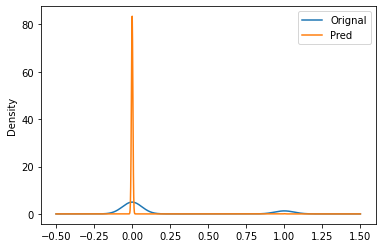

In [28]:

ax = df['Exited'].plot.kde(label='Orignal')
ax = df['pred'].astype(int).plot.kde(ax=ax,label='Pred')
plt.legend()
plt.show()

In [29]:
classifier.save("churn_prediction.h5")

In [30]:
model = tf.keras.models.load_model('churn_prediction.h5')

In [31]:
model

In [32]:
scale

StandardScaler()

In [33]:
df.columns.tolist()

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'pred']

In [35]:
df.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [35]:
creditscore = 500
gender = "Male"
age = 25
tenure = 5
balance =97198.540000
noofproduct = 1
hascard=1
isactivemember = 1
salary = 100000



In [36]:
gen = genderEnc.transform(np.array([[gender]]))[0]

C:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
features = np.array([[creditscore,gen,age,tenure,balance,noofproduct,hascard,isactivemember,salary]])

In [38]:
features.shape

(1, 9)

In [39]:
output = model.predict(features)[0][0]

In [40]:
if output > 0.5:
    result = "customer is likely to leave the bank."
else:
    result = "this candidate will be a loyal customer."